In [1]:
def fun(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.linalg as lin
import numpy as np

In [29]:
lin.solve?

In [3]:
A = np.array([[1., 1.], [1., 15.]])
b = np.array([fun(1.), fun(15.)])
print A, b

[[  1.   1.]
 [  1.  15.]] [ 3.25221687  0.63522142]


In [4]:
w = lin.solve(A, b)
w

array([ 3.43914511, -0.18692825])

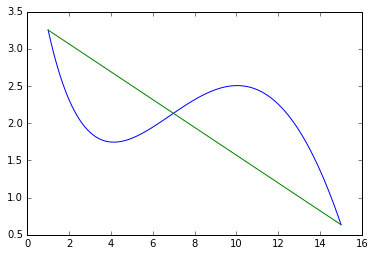

In [5]:
x = np.linspace(1, 15, 100)
plt.plot(x, fun(x))
plt.plot(x, w[1] * x + w[0])

In [44]:
A = np.array([[1., 1., 1.], [1., 8., 64.], [1., 15., 225.,]])
b = np.array([fun(1.), fun(8.), fun(15.)])

In [45]:
w = lin.solve(A, b)
w

array([ 3.32512949, -0.06531159, -0.00760104])

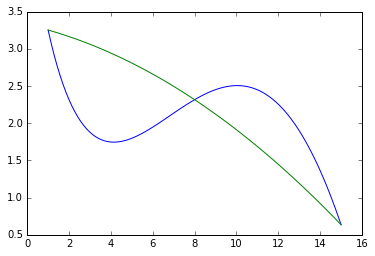

In [46]:
x = np.linspace(1, 15, 100)
plt.plot(x, fun(x))
plt.plot(x, w[2] *(x**2) + w[1] * x + w[0])

In [9]:
A = np.array([[1., 1., 1., 1.], [1., 4., 16., 64.], [1., 10., 100., 1000.], [1, 15, 225, 225*15]])
b = np.array([fun(1.), fun(4.), fun(10), fun(15.)])

In [48]:
w = lin.solve(A, b)
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

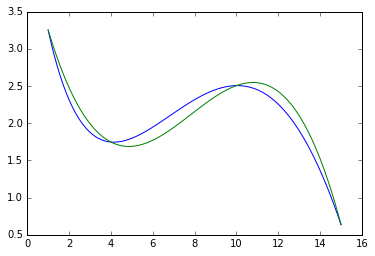

In [57]:
x = np.linspace(1, 15, 100)
plt.plot(x, fun(x))
plt.plot(x, w[3] * (x**3) + w[2] *(x**2) + w[1] * x + w[0])

In [51]:
print w

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [59]:
file_obj = open('submission-2.txt', 'w')
file_obj.write('{0} {1} {2} {3}'.format(w[0], w[1], w[2], w[3]))
file_obj.close()

In [60]:
!cat submission-2.txt

4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332

In [6]:
import pandas as pd

In [10]:
frame = pd.DataFrame(A)

In [12]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
0    4 non-null float64
1    4 non-null float64
2    4 non-null float64
3    4 non-null float64
dtypes: float64(4)
memory usage: 200.0 bytes


In [7]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

In [15]:
minimize?

In [8]:
answer1 = minimize(fun, x0 = 2, method="BFGS").x
print answer1

[ 4.13627618]


In [10]:
answer2 = minimize(fun, x0 = 30, method="BFGS").x
print answer2

[ 25.88019347]


In [16]:
print("{0:.2f} {1:.2f}".format(round(fun(answer1), 2), round(fun(answer2), 2)))

1.75 -11.90


In [17]:
answer3 = differential_evolution(fun, bounds=[(1,30)]).x

In [18]:
def hun(x):
    return (fun(x)).astype(int)

In [19]:
answer4 = minimize(hun, x0 = 30).x

In [20]:
answer5 = differential_evolution(hun, bounds=[(1,30)]).x

In [21]:
file_obj = open('submission-3.txt', 'w')
file_obj.write('{0:.2f} {1:.2f}'.format(round(fun(answer1),2), round(fun(answer2),2)))
file_obj.close()

In [22]:
!cat submission-3.txt

1.75 -11.90

In [25]:
file_obj = open('submission-4.txt', 'w')
file_obj.write('{0:.2f}'.format(round(fun(answer3), 2)))
file_obj.close()

In [26]:
!cat submission-4.txt

-11.90

In [27]:
file_obj = open('submission-5.txt', 'w')
file_obj.write('{0:.2f} {1:.2f}'.format(round(hun(answer4),2), round(hun(answer5),2)))
file_obj.close()

In [28]:
!cat submission-5.txt

-5.00 -11.00